<a href="https://www.kaggle.com/code/electromarine/comp-2-backpack-prediction?scriptVersionId=224973173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


### Let's explore train data

In [2]:
#importing important libraries
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
#df1.shape

In [5]:
# df2=pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
# df2.head()

In [6]:
#df2.shape

In [7]:
# df=pd.concat([df1,df2],ignore_index=True)
# df.head()

In [8]:
#df.shape

In [9]:
100*df.isnull().mean()

id                      0.000000
Brand                   3.235000
Material                2.782333
Size                    2.198333
Compartments            0.000000
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
Price                   0.000000
dtype: float64

In [10]:
object_col=[]
for col in df.columns:
    if df[col].dtype=="O":
        object_col.append(col)
print(object_col) 


['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


In [11]:
#Handling the missing values in categorical features by imputing the mode (most frequest class)

df[object_col]=df[object_col].apply(lambda x: x.fillna(x.mode()[0]) if x.isna else x)

In [12]:
# Checkingthe missing percentage again
100*df.isnull().mean()

id                      0.000
Brand                   0.000
Material                0.000
Size                    0.000
Compartments            0.000
Laptop Compartment      0.000
Waterproof              0.000
Style                   0.000
Color                   0.000
Weight Capacity (kg)    0.046
Price                   0.000
dtype: float64

In [13]:
#Handling the missing row values in ordinal feature by imputing mean value of that feature
df["Weight Capacity (kg)"]=df["Weight Capacity (kg)"].fillna(df["Weight Capacity (kg)"].median())

In [14]:
# Checking the missing percentage again
100*df.isnull().mean()

id                      0.0
Brand                   0.0
Material                0.0
Size                    0.0
Compartments            0.0
Laptop Compartment      0.0
Waterproof              0.0
Style                   0.0
Color                   0.0
Weight Capacity (kg)    0.0
Price                   0.0
dtype: float64

In [15]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,5.443590,18.030012,81.411107
std,86602.684716,2.890766,6.965312,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.099086,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.001145,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [16]:
# Creating a dummy variable for the categorical variables and dropping the first one.
for col in object_col:
    dummies = pd.get_dummies(df[col], dtype=int, drop_first=True, prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=[col], inplace=True)

df.head(-1)

,id,Compartments,Weight Capacity (kg),Price,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,11.611723,112.15875,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,10.0,27.078537,68.88056,1,0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
2,2,2.0,16.643760,39.17320,0,0,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
3,3,8.0,12.937220,80.60793,0,1,0,0,0,1,...,1,1,0,1,0,0,0,1,0,0
4,4,1.0,17.749338,86.02312,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,299994,4.0,20.392117,113.59984,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
299995,299995,9.0,12.730812,129.99749,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
299996,299996,6.0,26.633182,19.85819,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
299997,299997,9.0,11.898250,111.41364,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## Data preps for model building

In [17]:
# Putting feature variables to X
X = df.drop('Price',axis=1)

# Putting target variable to y
y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# rescalling
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()

In [22]:
#fitting and transforming the train data points
X_train_scaled=scaler.fit_transform(X_train)

# Transforming the test data points only
X_test_scaled=scaler.transform(X_test)

# Convert the NumPy array back to a pandas DataFrame
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
X_train_scaled.head(2)

,id,Compartments,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.268298,0.444444,0.162344,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.092284,0.000000,0.474774,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_test_scaled.head(2)

,id,Compartments,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,...,Size_Small,Laptop Compartment_Yes,Waterproof_Yes,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.062760,0.888889,0.541552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.428653,0.000000,0.753260,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


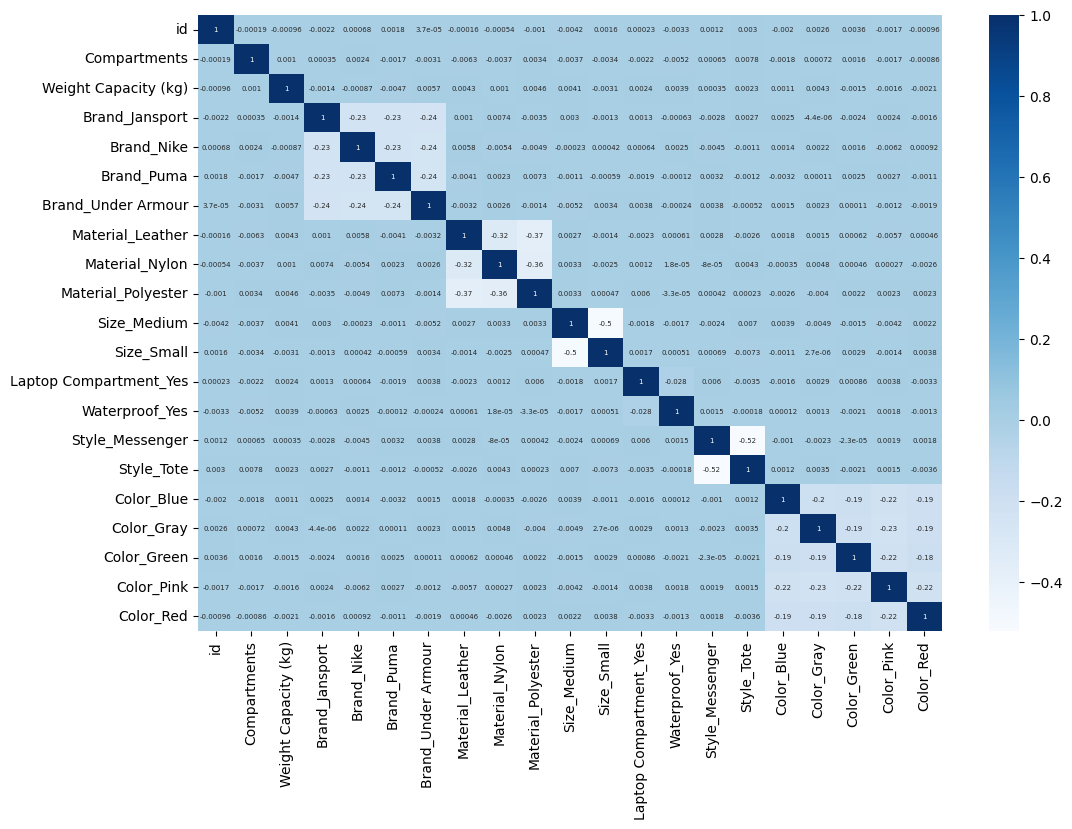

In [25]:
# Let's see the correlation matrix 
import seaborn as sns
plt.figure(figsize = (12,8))        # Size of the figure
sns.heatmap(X_train_scaled.corr(),annot = True,cmap="Blues",annot_kws={"fontsize": 5})
plt.show()

In [26]:
#importing statsmodels
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(estimator=lm, n_features_to_select=10)
rfe= rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('id', False, 12),
 ('Compartments', False, 10),
 ('Weight Capacity (kg)', False, 8),
 ('Brand_Jansport', True, 1),
 ('Brand_Nike', False, 2),
 ('Brand_Puma', False, 3),
 ('Brand_Under Armour', True, 1),
 ('Material_Leather', True, 1),
 ('Material_Nylon', True, 1),
 ('Material_Polyester', False, 5),
 ('Size_Medium', True, 1),
 ('Size_Small', False, 6),
 ('Laptop Compartment_Yes', False, 9),
 ('Waterproof_Yes', True, 1),
 ('Style_Messenger', False, 11),
 ('Style_Tote', False, 7),
 ('Color_Blue', True, 1),
 ('Color_Gray', False, 4),
 ('Color_Green', True, 1),
 ('Color_Pink', True, 1),
 ('Color_Red', True, 1)]

In [29]:
# Filtering columns which are rank 1
col = X_train.columns[rfe.support_]
col

Index(['Brand_Jansport', 'Brand_Under Armour', 'Material_Leather',
       'Material_Nylon', 'Size_Medium', 'Waterproof_Yes', 'Color_Blue',
       'Color_Green', 'Color_Pink', 'Color_Red'],
      dtype='object')

In [30]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train, X_train_rfe).fit()

# Summary of the model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.94
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           5.73e-25
Time:                        11:39:13   Log-Likelihood:            -1.0675e+06
No. Observations:              210000   AIC:                         2.135e+06
Df Residuals:                  209989   BIC:                         2.135e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 81.4401      0

### Building a Random forest (Black-Box) Model

In [31]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import make_scorer, mean_squared_error

In [32]:
# rf=RandomForestRegressor(random_state=100,n_jobs=-1)

In [33]:
# Create the parameter grid based on the results of random search 
# params = {
#     'max_depth': [1, 2, 6,8, 10],
#     'min_samples_leaf': [50,100],
#     'max_features': [10,16,19],#inc 13
#     'n_estimators': [10,30] #inc 40
# }

In [34]:
# Define the custom scoring function for RMSE
# rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [35]:
# Instantiate the grid search model
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator=rf, 
#                            param_grid=params,
#                            cv=4, 
#                            verbose=1, 
#                            scoring = rmse_scorer)

In [36]:
# grid_search.fit(X,y)

In [37]:
# Use the best estimator from GridSearchCV
# rf_best = grid_search.best_estimator_
# rf_best

In [38]:
# from yellowbrick.regressor import PredictionError


# # Create the prediction error plot using the best estimator
# visualizer = PredictionError(rf_best)
# visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X, y)  # Evaluate the model on the test data
# visualizer.show()  # Finalize and render the figure


# #------------ 1st model R-squared:0.048